# Lotka-Volterra Model:

We will study the classic Lotka-Volterra model of competition between two species (rabbits and sheep).

$x(t) =$ population of rabbits

$y(t) =$ population of sheep

$$\dot{x} = x(3 - x - 2y)$$

$$\dot{y} = y(2 - x - y)$$

Both species are competing for the same food supply and the amount available is limited. We ignore predators, seasonal effects, and other sources of food. Then there are two main effects we should consider:

* 1. Each species would grow to its carrying capacity in the absence of the other (logistic growth for each species). Rabbits have a higher intrinsic growth rate.

* 2. We’ll assume that rabbit-sheep conflicts occur at a rate proportional to the size of each population, and we assume that the conflicts reduce the growth rate for each species, but the effect is more severe for the rabbits.

In [1]:
# Importing libraries:

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### Fixed points:

In [5]:
# Define symbols
x, y = sp.symbols("x y")

$$\dot{x} = x(3 - x - 2y)$$

$$\dot{y} = y(2 - x - y)$$

In [3]:
# Define the system
x_dot = x*(3 - x - 2*y)
y_dot = y*(2 - x - y)

# Get Fixed Points
fixed_points = sp.solve((x_dot, y_dot), (x, y))
print(f"Fixed Points: {fixed_points}\n")

Fixed Points: [(0, 0), (0, 2), (1, 1), (3, 0)]



In [4]:
print(fixed_points[2])

(1, 1)


### Linearisation analysis:

In [6]:
# Jacobian Matrix
F = sp.Matrix([x_dot, y_dot])
V = sp.Matrix([x, y])

J = F.jacobian(V)

print(f"Jacobian J(x, y):\n{J}\n")

Jacobian J(x, y):
Matrix([[-2*x - 2*y + 3, -2*x], [-y, -x - 2*y + 2]])



In [7]:
# Classification by Linearisation

for fp in fixed_points:
    
    # Get coordinates of fixed points
    x_fp, y_fp = fp
    
    # Jacobian matrix evaluation
    J_fp = J.subs({x: x_fp, y: y_fp})

    # Print eigenvalues
    eigenvals = J_fp.eigenvals()

    print(fp, list(eigenvals.keys()))

(0, 0) [3, 2]
(0, 2) [-1, -2]
(1, 1) [-sqrt(2) - 1, -1 + sqrt(2)]
(3, 0) [-1, -3]


In [8]:
# Set limits
x_min, x_max = -1., 4.
y_min, y_max = -1., 4.

# Generate axes
x_1d = np.linspace(x_min, x_max, 30)
y_1d = np.linspace(y_min, y_max, 30)

# Create meshgrid
x_2d, y_2d = np.meshgrid(x_1d, y_1d)

# Compute the vector components at each grid point
u_2d = x_2d*(3.-x_2d-2*y_2d)    # dx/dt
v_2d = y_2d*(2.-x_2d-y_2d)      # dy/dt

# Normalise the vectors for plotting
mag = np.sqrt(u_2d**2 + v_2d**2)
u_2d = u_2d / mag
v_2d = v_2d / mag

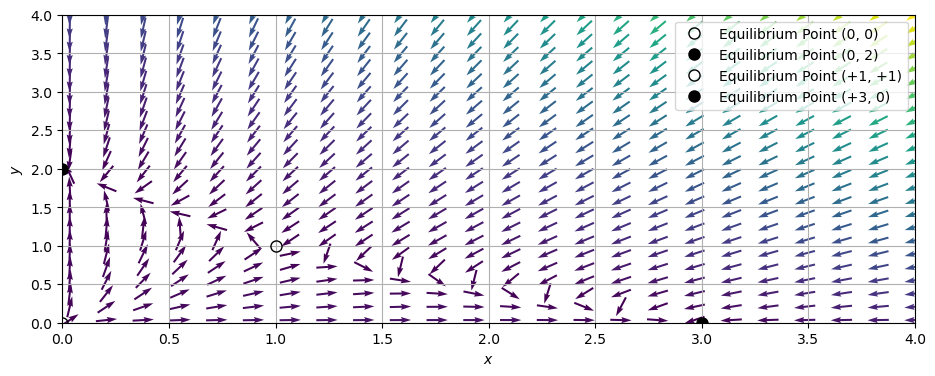

In [10]:
plt.figure(figsize=(11, 4))

# Plot the equilibrium points
plt.plot(fixed_points[0][0],fixed_points[0][1], 'ko', markersize=8, label='Equilibrium Point (0, 0)', fillstyle='none')
plt.plot(fixed_points[1][0],fixed_points[1][1], 'ko', markersize=8, label='Equilibrium Point (0, 2)')
plt.plot(fixed_points[2][0],fixed_points[2][1], 'ko', markersize=8, label='Equilibrium Point (+1, +1)', fillstyle='none')
plt.plot(fixed_points[3][0],fixed_points[3][1], 'ko', markersize=8, label='Equilibrium Point (+3, 0)')

# Plot the direction field
plt.quiver(x_2d, y_2d, u_2d, v_2d, mag, cmap='viridis', scale=40, pivot='mid', linewidth=0.5)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(0., x_max)
plt.ylim(0., y_max)

plt.legend()

plt.grid(True)

plt.show()

In [11]:
from scipy.integrate import solve_ivp

In [13]:
# ODE system
def system(t, state):
    """
    state -> [x, y]
    Returns -> [dx/dt, dy/dt]
    """
    x, y = state
    
    # Slopes
    dxdt = x*(3.-x-2*y)
    dydt = y*(2.-x-y)
    
    return [dxdt, dydt]

In [14]:
# Time axis
t_lims = [0., 5.]
t_axis = np.linspace(t_lims[0], t_lims[1], 100)

# A list of ICs [x0, y0]
ics = [
    [2., 2.],
    [1.,0.5],
    [2.,1.5],
]

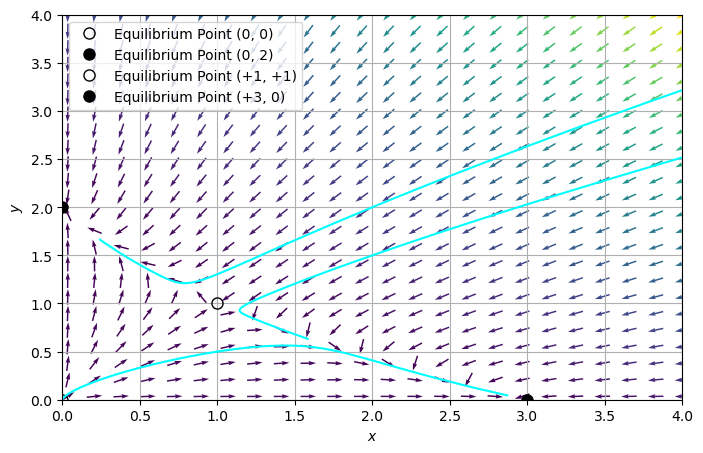

In [15]:
plt.figure(figsize=(8, 5))

# Plot the equilibrium points
plt.plot(fixed_points[0][0],fixed_points[0][1], 'ko', markersize=8, label='Equilibrium Point (0, 0)', fillstyle='none')
plt.plot(fixed_points[1][0],fixed_points[1][1], 'ko', markersize=8, label='Equilibrium Point (0, 2)')
plt.plot(fixed_points[2][0],fixed_points[2][1], 'ko', markersize=8, label='Equilibrium Point (+1, +1)', fillstyle='none')
plt.plot(fixed_points[3][0],fixed_points[3][1], 'ko', markersize=8, label='Equilibrium Point (+3, 0)')

# Plot the direction field
plt.quiver(x_2d, y_2d, u_2d, v_2d, mag, cmap='viridis', scale=40, pivot='mid', linewidth=0.5)

# Integrate and plot trajectories
for x0, y0 in ics:
    # Integrate and plot trajectories
    sol = solve_ivp(system, t_lims, [x0, y0], t_eval=t_axis, method='RK45')
    plt.plot(sol.y[0], sol.y[1], color='cyan')

    # Integrate and plot reverse-time trajectories
    sol_r = solve_ivp(system, [0., -4.], [x0, y0], t_eval=np.linspace(0., -4., 200), method='RK45')
    plt.plot(sol_r.y[0], sol_r.y[1], color='cyan')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(0., x_max)
plt.ylim(0., y_max)

plt.legend()

plt.grid(True)

plt.show()